## 图像基本操作
-------
# 数据读取-图像
 - cv2.IMREAD_COLOR：彩色图像
 - cv2.IMREAD_CRAYSCALE：灰度图像

In [1]:
import os
os.sys.path
import cv2 #opencv默认读取的格式是BGR
import matplotlib.pylab as plt
import numpy as numpy
%matplotlib inline
img=cv2.imread('./picture/cat.png')


In [2]:
#图像的显示，也可以创建多个窗口
cv2.imshow('image',img)
#等待时间，毫秒级，0表示任意键终止
cv2.waitKey(0)
cv2.destroyAllWindows()

2024-02-21 23:16:07.812 Python[63178:7444503] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.


In [3]:
def cv_show(name,img):
    cv2.imshow(name,img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [4]:
img.shape

(1024, 1024, 3)

In [5]:
img=cv2.imread('./picture/cat.png',cv2.IMREAD_GRAYSCALE)
img

array([[86, 90, 92, ..., 61, 61, 58],
       [90, 93, 93, ..., 62, 61, 59],
       [92, 92, 94, ..., 60, 60, 60],
       ...,
       [53, 54, 54, ..., 27, 28, 29],
       [54, 55, 55, ..., 28, 29, 30],
       [53, 53, 53, ..., 27, 28, 30]], dtype=uint8)

In [6]:
img.shape

(1024, 1024)

In [8]:
#图像的显示，也可以创建多个窗口
cv2.imshow('./picture/cat.png',img)
cv2.waitKey(10000)
cv2.destroyAllWindows()


In [9]:
#保存
cv2.imwrite('./picture/write.png',img)

True

In [10]:
type(img)

numpy.ndarray

In [11]:
img.size

1048576

# 数据读取-视频
 - cv2.VideoCapture可以捕获摄像头，用数字来控制不同的设备，例如0，1   
 - 如果是视频文件，直接指定好路径即可   
 

In [12]:
vc=cv2.VideoCapture('./picture/test.mp4')

In [13]:
# 检查是否打开正确
if vc.isOpened():
    open,frame=vc.read()
else:
    open =False
    

In [14]:
while open:
    ret,frame=vc.read()
    if frame is None:
        break
    if ret == True:
        gray =cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        cv2.imshow('result',gray)
        if cv2.waitKey(10) & 0xFF ==27:
            break
vc.release()
cv2.destroyAllWindows()

# 截取部分图像数据

In [15]:
img=cv2.imread('./picture/cat.png')
cat=img[0:200,0:200]
cv_show('cat',cat)

# 颜色通道提取

In [16]:
b,g,r=cv2.split(img)

In [21]:
print(b.shape)
print(g.shape)

(1024, 1024)
(1024, 1024)


In [23]:
img=cv2.merge((b,g,r))
img.shape

(1024, 1024, 3)

In [24]:
#只保留R
cur_img=img.copy()
cur_img[:,:,0]=0
cur_img[:,:,1]=0
cv_show('R',cur_img)

In [25]:
#只保留G
cur_img=img.copy()
cur_img[:,:,0]=0
cur_img[:,:,2]=0
cv_show('G',cur_img)

In [26]:
#只保留B
cur_img=img.copy()
cur_img[:,:,1]=0
cur_img[:,:,2]=0
cv_show('B',cur_img)

In [27]:
top_size,bottom_size,left_size,right_size=(50,50,50,50)
replicate=cv2.copyMakeBorder(img,top_size,bottom_size,left_size,right_size,borderType=cv2.BORDER_REPLICATE)
reflect=cv2.copyMakeBorder(img,top_size,bottom_size,left_size,right_size,borderType=cv2.BORDER_REFLECT)
reflect101=cv2.copyMakeBorder(img,top_size,bottom_size,left_size,right_size,borderType=cv2.BORDER_REFLECT_101)
wrap=cv2.copyMakeBorder(img,top_size,bottom_size,left_size,right_size,borderType=cv2.BORDER_WRAP)
constant=cv2.copyMakeBorder(img,top_size,bottom_size,left_size,right_size,borderType=cv2.BORDER_CONSTANT,value=0)

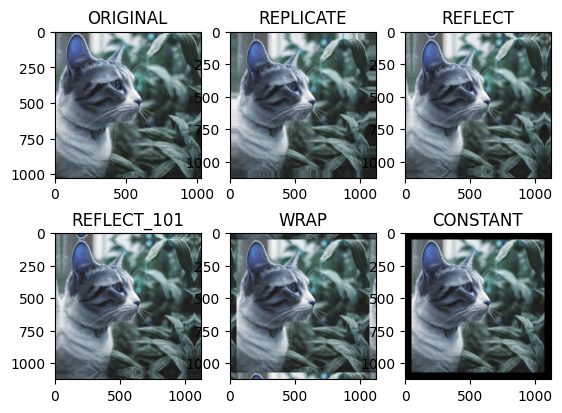

In [28]:
import matplotlib.pyplot as plt
plt.subplot(231),plt.imshow(img,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')
plt.show()

- BORDER_REPLICATE:复制法，也就是复制最边缘像素
- BORDER_REFLECT:反射法，对感兴趣的图像中的像素在两边进行复制，例如：fedcba|abcdefgh|hgfedcb
- BORDER_REFLECT_101:反射法，也就是以最边缘像素为轴，对称，gfedcb|abcdefgh|gfedcba
- BORDER_WRAP:外包装法，cdefgh|abcdefgh|abcdefg
- BORDER_CONSTANT:常量法，常数值填充